In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/Users/riyachanduka/Documents/Capstone_INST736/all_pt-csv_charge.csv')

In [3]:
df.head()

,original_sheet,record_number,sheet_id,sid_number,gender,race,dob,computed_age,court_date,intake_date,...,case_number_original_field,court_original_field,judge_name_original_field,court_sentencing_original_field,charge_original_field,violation_reason_or_dont_use,judges_decision_or_dont_use,judge_name_or_dont_use,case_number_or_dont_use,charge_open_refine_field_no_use
0,active_pt,1,active_pt_1,4304458,M,B,11/11/99,18.0,1/24/19,2017-11-30T00:00:00Z,...,D043CR17001009,NaN,Chesser,no information provided,Robbery,NaN,Level 4,Chesser,D043CR17001009,robbery
1,active_pt,2,active_pt_2,3168416,M,W,2/22/94,24.0,3/11/19,2018-07-23T00:00:00Z,...,C18CR18280,NaN,Chesser,no information provided,Burlary 1st,NaN,Level 2,Chesser,C18CR18280,burglary 1st
2,active_pt,3,active_pt_3,3775956,M,W,3/15/81,37.0,1/15/19,2018-07-27T00:00:00Z,...,D043CR181093,NaN,"Riddle, Mr",no information provided,Child abuse 2,NaN,Level 3,Robert Riddle,D043CR181093,child abuse 2nd
3,active_pt,4,active_pt_4,1458033,M,B,12/8/74,43.0,11/27/18,2018-07-16T00:00:00Z,...,C18CR17107,NaN,Stamm,no information provided,Non-support,NaN,Level 2,Stamm,C18CR17107,non-support
4,active_pt,5,active_pt_5,1130717,M,B,1/26/70,48.0,2/25/19,2018-09-10T00:00:00Z,...,18K1679,NaN,Stamm,no information provided,VOP (CDS poss not mari),NaN,Level 3,Stamm,18K1679,vop - cds possession not marijuana


In [4]:
df.columns

Index(['original_sheet', 'record_number', 'sheet_id', 'sid_number', 'gender',
       'race', 'dob', 'computed_age', 'court_date', 'intake_date', 'charge_1',
       'Charge_Level', 'charge_2', 'charge_3', 'charge_4', 'charge_5',
       'case_number_1', 'case_number_2', 'case_number_3', 'case_number_4',
       'case_number_5', 'case_number_6', 'case_number_7', 'case_number_8',
       'case_number_9', 'risk_assess_level', 'points', 'override_notes',
       'court_type', 'judge_name_1', 'judge_name_2', 'judge_decision',
       'bond_amount', 'bond_percentage', 'bond_y_n', 'additional_comment',
       'address', 'phone_number', 'job_information', 'treatment_notes',
       'health_ins', 'release_date', 'court_sentence_notes', 'violation_date',
       'violation_reason_1', 'violation_reason_2', 'violation_reason_3',
       'risk_assessment_level_original_field',
       'override_details_or_notes_original_field',
       'judges_decision_original_field', 'additional_comments_original_field',
  

In [5]:
df.shape

(3049, 64)

In [6]:
new_df_risk = df.filter(['charge_1','race','risk_assess_level'], axis=1)

In [7]:
new_df_risk.head(20)

,charge_1,race,risk_assess_level
0,robbery,B,Detain
1,burglary 1st,W,Detain
2,child abuse 2nd,W,Detain
3,non-support,B,Level 2
4,vop - cds possession not marijuana,B,Level 3
5,dv - assault 1st,W,NaN
6,assault 2nd,W,Level 3
7,violate exparte,B,Sent by judge
8,vop - sex offense 3rd,B,No recommendation
9,theft 1500 to 25000,B,Level 1


In [8]:
df_no_rec = new_df_risk[new_df_risk.risk_assess_level == 'No recommendation']

In [9]:
df_no_rec.head()

,charge_1,race,risk_assess_level
8,vop - sex offense 3rd,B,No recommendation
2064,assault 2nd,B,No recommendation
2065,vop - arson threat,B,No recommendation
2066,failure to register as sex offender,B,No recommendation
2067,cds possession marijuana,W,No recommendation


In [10]:
new_df = df.filter(['Charge_Level','race','risk_assess_level'], axis=1)

In [11]:
new_no_rec = new_df[new_df.risk_assess_level == 'No recommendation']

In [12]:
new_no_rec.head()

,Charge_Level,race,risk_assess_level
8,High,B,No recommendation
2064,High,B,No recommendation
2065,Highest,B,No recommendation
2066,Low,B,No recommendation
2067,High,W,No recommendation


In [19]:
charge_level_by_race=new_no_rec.groupby('Charge_Level').race.value_counts().sort_index()

In [20]:
temp_df=charge_level_by_race.unstack()

In [21]:
temp_df = temp_df.filter(['B','W'], axis=1)

In [22]:
temp_df

race,B,W
Charge_Level,,
High,50.0,69.0
Highest,7.0,2.0
Low,15.0,14.0
Moderate,35.0,84.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117ddd2e8>,
      dtype=object)

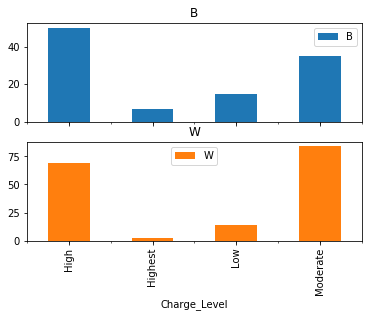

In [36]:
temp_df.plot(kind='bar', subplots=True)

## The risk assessment tool did not provide the maximum number of recommendations for Whites as compared to Blacks for Moderate and High Level of charges

In [25]:
new_no_rec

,Charge_Level,race,risk_assess_level
8,High,B,No recommendation
2064,High,B,No recommendation
2065,Highest,B,No recommendation
2066,Low,B,No recommendation
2067,High,W,No recommendation
2068,Low,B,No recommendation
2069,High,W,No recommendation
2070,High,W,No recommendation
2071,High,W,No recommendation
2072,High,W,No recommendation


In [26]:
Norec_by_charge_level=new_no_rec.groupby('Charge_Level').risk_assess_level.value_counts().sort_index()

In [27]:
Norec_by_charge_level

Charge_Level  risk_assess_level
High          No recommendation    120
Highest       No recommendation      9
Low           No recommendation     30
Moderate      No recommendation    121
Name: risk_assess_level, dtype: int64

In [29]:
Norec_by_charge_level=Norec_by_charge_level.unstack()

In [30]:
Norec_by_charge_level

risk_assess_level,No recommendation
Charge_Level,
High,120
Highest,9
Low,30
Moderate,121


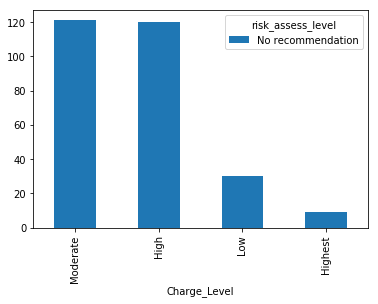

In [32]:
Norec_by_charge_level.sort_values('No recommendation', ascending=False).plot.bar(stacked=True)

## The risk assessment tool did not provide the maximum number of recommendations for Moderate and High Level of charges